# Exp 6: SOM 

In [1]:
import math

In [2]:
class SOM :
    # Function here computes the winning vector
    # by Euclidean distance
    def winner( self, weights, sample ):
        D0 = 0
        D1 = 0
        for i in range( len( sample ) ) :
            D0 = D0 + math.pow( ( sample[i] - weights[0][i] ), 2 )
            D1 = D1 + math.pow( ( sample[i] - weights[1][i] ), 2 )
        print("Euclidean distance from W1 = ",D0)
        print("Euclidean distance from W2 = ",D1)
        if D0 < D1 :
            return 0
        else :
            return 1

    # Function here updates the winning vector
    def update( self, weights, sample, J, alpha ) :
        for i in range(0,4):
            weights[J][i] = weights[J][i] + alpha * ( sample[i] - weights[J][i] )
        print("Updated Weights =",weights,"\n")
        return weights

In [3]:
# Driver code
def main() :
    # Training Examples ( m, n )
    T = [ [ 1, 1, 0, 0 ], [ 0, 0, 0, 1 ], [ 1, 0, 0, 0 ], [ 0, 0, 1, 1 ] ]
    m, n = len( T ), len( T[0] )
    
    # weight initialization ( n, C )
    weights = [ [ 0.2, 0.6, 0.5, 0.9 ], [ 0.8, 0.4, 0.7, 0.3 ] ]

    # training
    ob = SOM()
    
    epochs = 1
    alpha = 0.5
    
    for i in range( epochs ) :
        for j in range( m ) :
            # training sample
            sample = T[j]
            print("Training Sample =",sample)
            # Compute winner vector
            J = ob.winner( weights, sample)
            # Update winning vector
            weights = ob.update( weights, sample, J, alpha)
            
    # classify test sample
    s = [ 0, 1, 1, 1 ]
    J = ob.winner( weights, s )
    print("\nTESTING:\nInput Sample :",s)
    print("PREDICTION:\nSample T belongs to class : ", J)
    print("Trained weights : ", weights)

In [4]:
if __name__ == "__main__":
    main()

Training Sample = [1, 1, 0, 0]
Euclidean distance from W1 =  1.8600000000000003
Euclidean distance from W2 =  0.9799999999999999
Updated Weights = [[0.2, 0.6, 0.5, 0.9], [0.9, 0.7, 0.35, 0.15]] 

Training Sample = [0, 0, 0, 1]
Euclidean distance from W1 =  0.66
Euclidean distance from W2 =  2.145
Updated Weights = [[0.1, 0.3, 0.25, 0.95], [0.9, 0.7, 0.35, 0.15]] 

Training Sample = [1, 0, 0, 0]
Euclidean distance from W1 =  1.865
Euclidean distance from W2 =  0.6449999999999999
Updated Weights = [[0.1, 0.3, 0.25, 0.95], [0.95, 0.35, 0.175, 0.075]] 

Training Sample = [0, 0, 1, 1]
Euclidean distance from W1 =  0.665
Euclidean distance from W2 =  2.5612500000000002
Updated Weights = [[0.05, 0.15, 0.625, 0.975], [0.95, 0.35, 0.175, 0.075]] 

Euclidean distance from W1 =  0.8662499999999999
Euclidean distance from W2 =  2.86125

TESTING:
Input Sample : [0, 1, 1, 1]
PREDICTION:
Sample T belongs to class :  0
Trained weights :  [[0.05, 0.15, 0.625, 0.975], [0.95, 0.35, 0.175, 0.075]]


## IRIS flower classification

In [61]:
import numpy as np
import matplotlib.pyplot as plt

In [62]:
def closest_node(data, t, map, m_rows, m_cols):
    # (row,col) of map node closest to data[t]
    result = (0,0)
    small_dist = 1.0e20
    for i in range(m_rows):
        for j in range(m_cols):
            ed = euc_dist(map[i][j], data[t])
            if ed < small_dist:
                small_dist = ed
                result = (i, j)
    return result

In [63]:
def euc_dist(v1, v2):
    return np.linalg.norm(v1 - v2) 

def manhattan_dist(r1, c1, r2, c2):
    return np.abs(r1-r2) + np.abs(c1-c2)

def most_common(lst, n):
    # lst is a list of values 0 . . n
    if len(lst) == 0: 
        return -1
    counts = np.zeros(shape=n, dtype=int)
    for i in range(len(lst)):
        counts[lst[i]] += 1
    return np.argmax(counts)

In [66]:
def main():
    # 0. get started
    np.random.seed(1)
    Dim = 4
    Rows = 30; Cols = 30
    RangeMax = Rows + Cols
    LearnMax = 0.5
    StepsMax = 5000
    
    # 1. load data
    print("\nLoading Iris data into memory \n")
    data_file = "iris_data_012.txt"
    data_x = np.loadtxt(data_file, delimiter=",", usecols=range(0,4), dtype=np.float64)
    data_y = np.loadtxt(data_file, delimiter=",", usecols=[4], dtype=int)
    # option: normalize data  
    
    # 2. construct the SOM
    print("Constructing a 30x30 SOM from the iris data")
    map = np.random.random_sample(size=(Rows,Cols,Dim))
    for s in range(StepsMax):
        if s % (StepsMax/10) == 0: 
            print("step = ", str(s))
        pct_left = 1.0 - ((s * 1.0) / StepsMax)
        curr_range = (int)(pct_left * RangeMax)
        curr_rate = pct_left * LearnMax
        
        t = np.random.randint(len(data_x))
        (bmu_row, bmu_col) = closest_node(data_x, t, map, Rows, Cols)
        for i in range(Rows):
            for j in range(Cols):
                if manhattan_dist(bmu_row, bmu_col, i, j) < curr_range:
                    map[i][j] = map[i][j] + curr_rate * (data_x[t] - map[i][j])
    print("SOM construction complete \n")
    
    # 3. construct U-Matrix
    print("Constructing U-Matrix from SOM")
    u_matrix = np.zeros(shape=(Rows,Cols), dtype=np.float64)
    for i in range(Rows):
        for j in range(Cols):
            v = map[i][j]  # a vector 
            sum_dists = 0.0; ct = 0
            if i-1 >= 0:    # above
                sum_dists += euc_dist(v, map[i-1][j]); ct += 1
            if i+1 <= Rows-1:   # below
                sum_dists += euc_dist(v, map[i+1][j]); ct += 1
            if j-1 >= 0:   # left
                sum_dists += euc_dist(v, map[i][j-1]); ct += 1
            if j+1 <= Cols-1:   # right
                sum_dists += euc_dist(v, map[i][j+1]); ct += 1
            u_matrix[i][j] = sum_dists / ct
    print("U-Matrix constructed \n")
    
    # display U-Matrix
    plt.imshow(u_matrix, cmap='gray')  # black = close = clusters
    plt.show()
    
    # 4. because the data has labels, another possible visualization:
    # associate each data label with a map node
    print("Associating each data label to one map node ")
    mapping = np.empty(shape=(Rows,Cols), dtype=object)
    for i in range(Rows):
        for j in range(Cols):
            mapping[i][j] = []
    
    for t in range(len(data_x)):
        (m_row, m_col) = closest_node(data_x, t, map, Rows, Cols)
        mapping[m_row][m_col].append(data_y[t])
        
    label_map = np.zeros(shape=(Rows,Cols), dtype=int)
    for i in range(Rows):
        for j in range(Cols):
            label_map[i][j] = most_common(mapping[i][j], 3)
            
    plt.imshow(label_map, cmap=plt.cm.get_cmap('terrain_r', 4))
    plt.colorbar()
    plt.show()


Loading Iris data into memory 

Constructing a 30x30 SOM from the iris data
step =  0
step =  500
step =  1000
step =  1500
step =  2000
step =  2500
step =  3000
step =  3500
step =  4000
step =  4500
SOM construction complete 

Constructing U-Matrix from SOM
U-Matrix constructed 



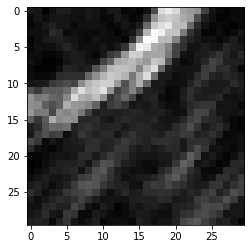

Associating each data label to one map node 


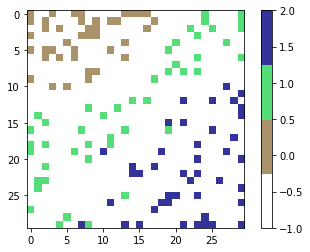

In [67]:
if __name__=="__main__":
    main()